In [1]:
import matplotlib.pyplot as plt
import networkx as nx

from rwa_tools import (
    create_coupling_graph,
    split_into_independent_components,
    create_hamiltonian_symbolic,
    split_hamiltonian_by_components,
)

In [2]:
nstates = 7
couplings = [[(0, 2), (1, 2)], [(3, 5), (4, 5)]]
hamiltonian = create_hamiltonian_symbolic(couplings, nstates)
coupling_graph = create_coupling_graph(couplings, nstates=nstates)

In [3]:
hamiltonian.total

Matrix([
[                          E0,                            0, Ω0*exp(I*t*ω0)/2,                            0,                            0,                0,  0],
[                           0,                           E1, Ω0*exp(I*t*ω0)/2,                            0,                            0,                0,  0],
[exp(-I*t*ω0)*conjugate(Ω0)/2, exp(-I*t*ω0)*conjugate(Ω0)/2,               E2,                            0,                            0,                0,  0],
[                           0,                            0,                0,                           E3,                            0, Ω1*exp(I*t*ω1)/2,  0],
[                           0,                            0,                0,                            0,                           E4, Ω1*exp(I*t*ω1)/2,  0],
[                           0,                            0,                0, exp(-I*t*ω1)*conjugate(Ω1)/2, exp(-I*t*ω1)*conjugate(Ω1)/2,               E5,  0],
[                  

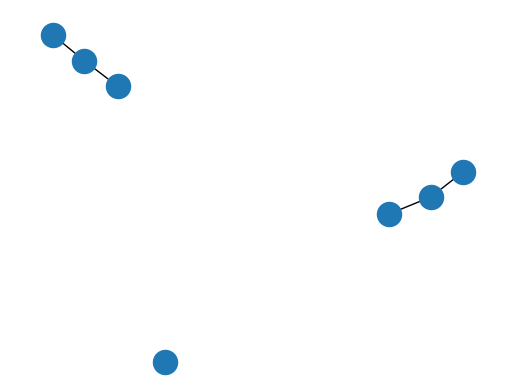

In [4]:
fig, ax = plt.subplots()
nx.draw(coupling_graph)

In [5]:
independent_graphs = split_into_independent_components(coupling_graph)

In [6]:
independent_hamiltonians = split_hamiltonian_by_components(
    hamiltonian, independent_graphs
)

In [7]:
independent_hamiltonians[0].total

Matrix([
[                          E0,                            0, Ω0*exp(I*t*ω0)/2],
[                           0,                           E1, Ω0*exp(I*t*ω0)/2],
[exp(-I*t*ω0)*conjugate(Ω0)/2, exp(-I*t*ω0)*conjugate(Ω0)/2,               E2]])

In [8]:
independent_hamiltonians[1].total

Matrix([
[                          E3,                            0, Ω1*exp(I*t*ω1)/2],
[                           0,                           E4, Ω1*exp(I*t*ω1)/2],
[exp(-I*t*ω1)*conjugate(Ω1)/2, exp(-I*t*ω1)*conjugate(Ω1)/2,               E5]])